<a href="https://colab.research.google.com/github/RayhanehCoding/Personal-Projects/blob/main/Energy_usage_Germany.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = '/content/drive/MyDrive/projects/energy usage/time_series_15min_singleindex.csv'
data = pd.read_csv(file_path)
print(data.head())
print(data.isnull().sum())

          utc_timestamp        cet_cest_timestamp  \
0  2014-12-31T23:00:00Z  2015-01-01T00:00:00+0100   
1  2014-12-31T23:15:00Z  2015-01-01T00:15:00+0100   
2  2014-12-31T23:30:00Z  2015-01-01T00:30:00+0100   
3  2014-12-31T23:45:00Z  2015-01-01T00:45:00+0100   
4  2015-01-01T00:00:00Z  2015-01-01T01:00:00+0100   

   AT_load_actual_entsoe_transparency  AT_load_forecast_entsoe_transparency  \
0                                 NaN                                   NaN   
1                                 NaN                                   NaN   
2                                 NaN                                   NaN   
3                                 NaN                                   NaN   
4                                 NaN                                   NaN   

   AT_price_day_ahead  AT_solar_generation_actual  \
0                 NaN                         NaN   
1                 NaN                         NaN   
2                 NaN                         N

In [ ]:
total_rows = data.shape[0]
total_columns = data.shape[1]

# Count columns with missing values
columns_with_missing_values = data.isnull().sum() > 0
missing_columns_count = columns_with_missing_values.sum()
print(f"Number of columns with missing values: {missing_columns_count} out of {total_columns} columns")

# Count rows with missing values
rows_with_missing_values = data.isnull().any(axis=1)
missing_rows_count = rows_with_missing_values.sum()
print(f"Number of rows with missing values: {missing_rows_count} out of {total_rows} rows")

Number of columns with missing values: 37 out of 61 columns
Number of rows with missing values: 201598 out of 201598 rows


In [ ]:
# Apply interpolation to fill missing values
data_filled = data.interpolate(method='linear')
#print(data.columns)
data.columns = data.columns.str.strip()

<ipython-input-59-cf8443035a0d>:2: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  data_filled = data.interpolate(method='linear')


In [ ]:
# Handling missing data
#data_cleaned = data.dropna(subset=['DE_load_actual_entsoe_transparency'])
#print(data_cleaned.head())

In [ ]:
#print(data_filled.columns)
#print(data_filled['utc_timestamp'].head())
#print(data_filled.dtypes)

#data_filled['utc_timestamp'] = pd.to_datetime(data_filled['utc_timestamp'])

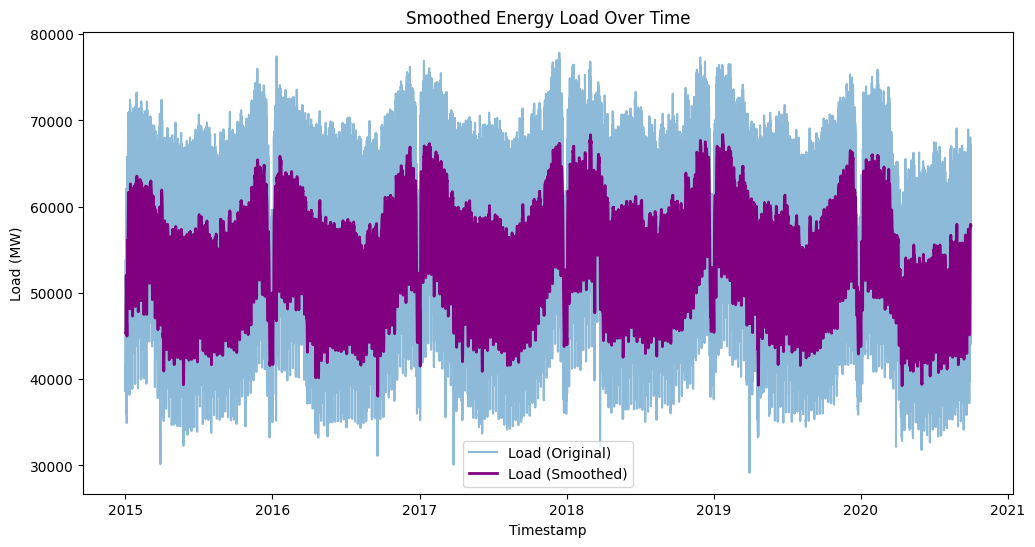

In [ ]:
# Apply a rolling mean with a window size of 96 (for 15-minute intervals, to smooth over daily fluctuations)
window_size = 96
data_filled['load_smoothed'] = data_filled['DE_load_actual_entsoe_transparency'].rolling(window=window_size).mean()

# Set the 'utc_timestamp' as the index (Make sure it's present in the dataset)
data_filled['utc_timestamp'] = pd.to_datetime(data_filled['utc_timestamp'])
data_filled.set_index('utc_timestamp', inplace=True)

# Plot both the original and smoothed data
plt.figure(figsize=(12, 6))
plt.plot(data_filled.index, data_filled['DE_load_actual_entsoe_transparency'], label='Load (Original)', alpha=0.5)
plt.plot(data_filled.index, data_filled['load_smoothed'], label='Load (Smoothed)', color='purple', linewidth=2)
plt.xlabel('Timestamp')
plt.ylabel('Load (MW)')
plt.title('Smoothed Energy Load Over Time')
plt.legend()
plt.show()



0


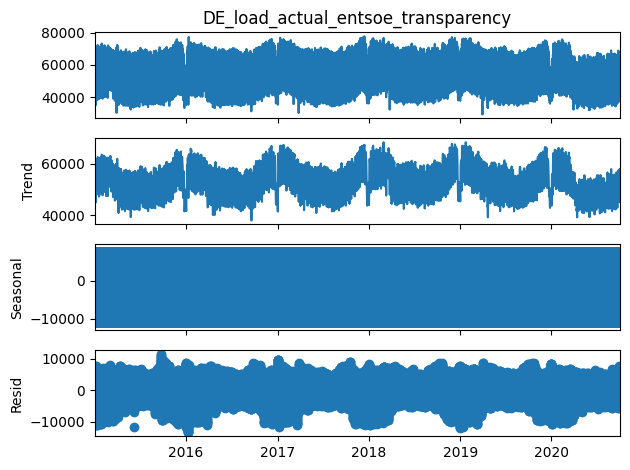

In [ ]:
# Check for missing values in the specific column used for seasonal decomposition
print(data_filled['DE_load_actual_entsoe_transparency'].isnull().sum())

# Interpolate missing values in the 'DE_load_actual_entsoe_transparency' column
data_filled['DE_load_actual_entsoe_transparency'] = data_filled['DE_load_actual_entsoe_transparency'].interpolate(method='linear')

# Drop rows with remaining NaNs in the 'DE_load_actual_entsoe_transparency' column
data_filled = data_filled.dropna(subset=['DE_load_actual_entsoe_transparency'])

# Apply seasonal decomposition (assuming the period is 96 15-minute intervals per day)
result = seasonal_decompose(data_filled['DE_load_actual_entsoe_transparency'], model='additive', period=96)
result.plot()
plt.show()

# Detecting outliers using a threshold (e.g., values greater than 3 standard deviations)
threshold = 3
mean_load = data_filled['DE_load_actual_entsoe_transparency'].mean()
std_dev_load = data_filled['DE_load_actual_entsoe_transparency'].std()
